<a href="https://colab.research.google.com/github/sivamanikandan45/DepressionDetectionusingTransformer/blob/main/DepressionDetectionusingDistilBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
import pandas as pd

In [ ]:
df_train = pd.read_csv('train.csv')
print(df_train)

                                                   text  category
0     Waiting for my mind to have a breakdown once t...         1
1     My new years resolution : I'm gonna get my ass...         1
2     New year : Somone else Feeling like 2020 will ...         1
3     My story I guess : Hi, Im from Germany and my ...         1
4     Sat in the dark and cried myself going into th...         1
...                                                 ...       ...
8886  Ways to reverse memory loss from depression? :...         2
8887  A Comprehensive Guide To Slowly Getting Better...         2
8888  I don’t think college is right for me : TW: su...         2
8889  Please help: Severe insomnia affecting me in m...         2
8890  With each passing day my depression is getting...         2

[8891 rows x 2 columns]


In [ ]:
df_train.category.unique()

array([1, 0, 2])

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 248 kB 14.0 MB/s 
     |████████████████████████████████| 3.5 MB 63.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 6.8 MB 60.3 MB/s 
     |████████████████████████████████| 9.7 MB 51.7 MB/s 
     |████████████████████████████████| 1.2 MB 68.7 MB/s 
     |████████████████████████████████| 1.7 MB 53.5 MB/s 
     |████████████████████████████████| 312 kB 73.3 MB/s 
     |████████████████████████████████| 596 kB 72.4 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 895 kB 63.6 MB/s 
     |████████████████████████████████| 143 kB 77.7 MB/s 
     |████████████████████████████████| 97 kB 9.4 MB/s 
     |████████████████████████████████| 180 kB 73.0 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 133 kB 75.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████

In [ ]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

np.set_printoptions(threshold=np.inf)

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re

def preprocess(sentence):
  sentence=str(sentence)
  sentence=sentence.lower()
  cleanr=re.compile('<.*?>')
  cleantext=re.sub(cleanr,'',sentence)
  rem_url=re.sub(r'http\S+','',cleantext)
  rem_num=re.sub('[0-9]+','',rem_url)
  rem_tag=re.sub(r'@\S+','',rem_num)
  tokenizer=RegexpTokenizer(r'\w+')
  tokens=tokenizer.tokenize(rem_tag)
  filtered_words=[w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
  return " ".join(filtered_words)

df_train['text']=df_train['text'].map(lambda s:preprocess(s))
df_train.head(20)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,category
0,waiting mind breakdown new year feeling anymor...,1
1,new years resolution gonna get ass therapists ...,1
2,new year somone else feeling like last year ea...,1
3,story guess germany english mostly self learne...,1
4,sat dark cried going new year great start,1
5,probably end mum around anymore say certainty ...,1
6,fuck left abusive relationship moved abusive f...,1
7,new year eve party want cry panic attack witho...,1
8,death father father died beginning december gr...,1
9,empty stuck loop every day order watch youtube...,1


In [ ]:
'''model_args = ClassificationArgs(sliding_window=True)
model=ClassificationModel('bert','setu4993/LaBSE',num_labels=3,use_cuda=False,args=model_args)'''
'''{
        "reprocess_input_data" : True,
        "use_cached_eval_features":False, 
        "overwrite_output_dir": True, 
        "num_train_epochs": 1 
        }'''

'''model = ClassificationModel(
    "roberta",
    "roberta-base",
    num_labels=3,
    weight=[0,1,2],
    use_cuda=False,
    args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False, 
        "overwrite_output_dir": True, 
        "num_train_epochs": 1 }
)'''
'''model=ClassificationModel('distilbert','distilbert-base-cased',num_labels=3,use_cuda=False,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False, 
        "overwrite_output_dir": True, 
        "num_train_epochs": 1 }
)
model=ClassificationModel('bert','setu4993/LaBSE',num_labels=3,use_cuda=False,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False, 
        "overwrite_output_dir": True, 
        "num_train_epochs": 1 }
)'''
model=ClassificationModel('distilbert','distilbert-base-cased',num_labels=3,use_cuda=True,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False, 
        "overwrite_output_dir": True, 
        "num_train_epochs": 5}
)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.wei

In [ ]:
model.train_model(df_train)

  0%|          | 0/8891 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1112 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1112 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1112 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1112 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1112 [00:00<?, ?it/s]

(5560, 0.2458168562743032)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dev_with_labels.csv to dev_with_labels.csv


In [ ]:
df_eval = pd.read_csv('dev_with_labels.csv')
print(df_eval)

                                                   text  category
0     I enjoyed today, and I still am! Tomorrows dep...         1
1     I sorta tried to kill myself : I had a total b...         1
2     Best suicide method? : I like it quick and eas...         1
3     a story : I remember the time I'd get on my 3D...         1
4     The world only cares about beautiful people : ...         1
...                                                 ...       ...
4491  Aren’t we all just tired? : I’ve been depresse...         2
4492  NEED HELP COPING : I had my life pretty much f...         2
4493  Qutting Zoloft Cold Turkey : I was on 75 mg se...         2
4494  Crying : I’m coming off my antidepressants and...         2
4495  Seeking for advice on how to overcome and deal...         2

[4496 rows x 2 columns]


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(df_eval)
print(result)

  0%|          | 0/4496 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/562 [00:00<?, ?it/s]

{'mcc': 0.15080580338993513, 'eval_loss': 2.3766482002582414}


In [ ]:
print(model_outputs)

[[ 4.17968750e+00 -1.79101562e+00 -3.28125000e+00]
 [-5.58105469e-01  2.95703125e+00 -2.52343750e+00]
 [ 4.90625000e+00 -2.51367188e+00 -3.13281250e+00]
 [ 4.21093750e+00 -1.79101562e+00 -3.19531250e+00]
 [ 4.00390625e+00 -1.85156250e+00 -2.89257812e+00]
 [ 2.70507812e+00 -1.65820312e+00 -1.51562500e+00]
 [ 2.98632812e+00 -9.01367188e-01 -2.39648438e+00]
 [ 3.18945312e+00 -1.20117188e+00 -2.48828125e+00]
 [ 1.24023438e+00  1.31225586e-01 -1.68945312e+00]
 [ 3.56835938e+00 -1.50878906e+00 -2.76757812e+00]
 [ 4.39453125e+00 -1.53027344e+00 -3.88476562e+00]
 [ 3.94531250e+00 -1.21289062e+00 -3.67773438e+00]
 [ 3.44140625e+00 -1.83886719e+00 -2.08984375e+00]
 [ 2.45898438e+00 -7.36816406e-01 -2.32617188e+00]
 [ 4.33984375e+00 -1.75683594e+00 -3.51953125e+00]
 [ 4.00390625e+00 -1.85058594e+00 -2.70507812e+00]
 [ 1.59570312e+00  7.85156250e-01 -2.95117188e+00]
 [ 2.65820312e+00 -3.32519531e-01 -2.72656250e+00]
 [ 2.66210938e+00 -9.22851562e-01 -2.42968750e+00]
 [ 3.25976562e+00 -1.20703125e+

In [ ]:
print(wrong_predictions)

[{'guid': 0, 'text_a': "I enjoyed today, and I still am! Tomorrows depression can wait! : Today, I'm warm and cozy :) I even had some tea, to complement my sandwich!\nThis is a crazy time we live in, but it's only the beginning, with the world going to shambles, being alone feels werid.\nBut a stranger came through and saved me,\nOf course it's a debt I'll have to repay, but I'm grateful to have this debt!\nCrazy what a few dollars can do to change someones situation.\nBut these days, it's all about here and now!\nI don't have the ability to relax just because, I'm full, clean, and warm.\nTomorrow it's back to reality! \nThe motel was just to get ourself together! We been out here panicking the past two weeks and the last 3 days exspecially.\nI got blessed this week that's for sure!\nTwo weeks till payday.\nWhat to do, what to do.\nWell I can't just pull another loan, so I gotta make what's left it last. \nPlanet fitness anyone???!! \nOkay actually, gas wise, idk, finding safe places t

In [ ]:
df_eval['category'].value_counts()

1    2306
0    1830
2     360
Name: category, dtype: int64

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
df_test= pd.read_csv('test_data.csv')
print(df_test)

                                                   text
0     Im scared : This is it. I lie to myself every ...
1     New to this but just wanted to vent : I just f...
2     I’m sad : It’s kinda always been an issue. I w...
3     Lonely but not alone. : All of my immediately ...
4     This year has been trash. : I dont know why I’...
...                                                 ...
3240  Feeling lonely. : Hi reddit, I haven’t posted ...
3241  When would suicide be right? : So I got back f...
3242  Lowest I’ve ever been ever. : To make a long s...
3243  Does the Toxoplasma Gondii ruined my life ? (f...
3244  Getting the correct diagnosis : Currently goin...

[3245 rows x 1 columns]


In [ ]:
predictions, raw_outputs = model.predict(df_test['text'].tolist())
print(predictions)
print(raw_outputs)


  0%|          | 0/3245 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

[0 0 0 0 0 0 1 1 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 2 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 2 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 2 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 2 1 0 0 0 0 0 0 2 0 1 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 2 0 

In [ ]:
print(predictions)

[0 0 0 0 0 0 1 1 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 2 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 2 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 2 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 2 1 0 0 0 0 0 0 2 0 1 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 2 0 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.metrics import classification_report
print(classification_report(df_test.category,predictions))

              precision    recall  f1-score   support

           0       0.46      0.83      0.59      1830
           1       0.64      0.20      0.30      2306
           2       0.37      0.52      0.43       360

    accuracy                           0.48      4496
   macro avg       0.49      0.51      0.44      4496
weighted avg       0.54      0.48      0.43      4496



In [ ]:
f = open("predictions.txt",'w+')
f.write(str(predictions))

f1 = open("raw_outputs.txt",'w+')
f1.write(str(raw_outputs))


165495

In [ ]:
df_tes = pd.read_csv('test_data.tsv', sep='\t')
df_tes['category'] = predictions
df_tes.to_csv('distil5.csv')

In [ ]:
df_tes = pd.read_csv('dev_with_labels.csv')
df_tes['predict'] = predictions
df_tes.to_csv('data1.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving distil5.csv to distil5 (1).csv


In [ ]:
df_tes = pd.read_csv('distil5 (1).csv')
df_tes.to_csv('distil5.tsv', sep='\t',index=False)
df_tes.head(20)

,Pid,class_label
0,test_pid_1,not depression
1,test_pid_2,not depression
2,test_pid_3,not depression
3,test_pid_4,not depression
4,test_pid_5,not depression
5,test_pid_6,not depression
6,test_pid_7,moderate
7,test_pid_8,moderate
8,test_pid_9,not depression
9,test_pid_10,severe


In [ ]:
df_test['category'].value_counts()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


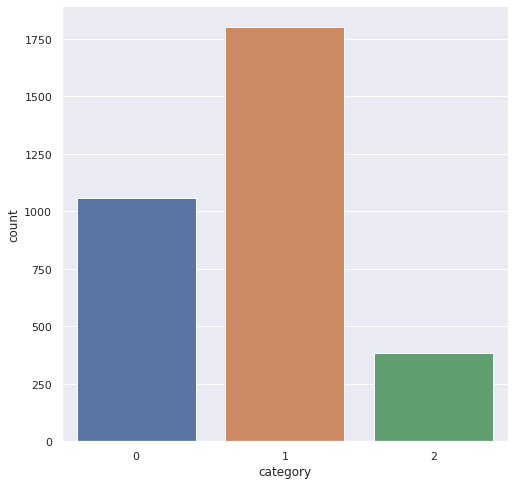

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
#sns.countplot(trainDF_Sheet_1['category'])
sns.countplot(df_test['category'])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving distil1.csv to distil1.csv


In [ ]:
import pandas as pd

In [ ]:
df_tes = pd.read_csv('distil1.csv')
df_tes.to_csv('scube_run1.tsv', sep='\t',index=False)
df_tes.head(20)

,Pid,class_label
0,test_pid_1,moderate
1,test_pid_2,not depression
2,test_pid_3,not depression
3,test_pid_4,not depression
4,test_pid_5,moderate
5,test_pid_6,moderate
6,test_pid_7,not depression
7,test_pid_8,moderate
8,test_pid_9,severe
9,test_pid_10,severe
